In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud
import re
import string
from sklearn import preprocessing
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
given_df = pd.read_csv("/content/fake_or_real_news.csv")
fakeN = pd.read_csv("/content/Fake.csv")
trueN = pd.read_csv("/content/True.csv")

In [6]:
given_df.head()

,ID,text,label
0,8476,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,It's primary day in New York and front-runners...,REAL


In [7]:
fakeN.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [8]:
trueN.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


### making target variables "labels"

In [9]:
label_encoder = preprocessing.LabelEncoder()
given_df['label']= label_encoder.fit_transform(given_df['label'])

In [10]:
given_df['label'].unique()

array([0, 1])

In [11]:
fakeN["label"] = 0
trueN["label"] = 1

In [12]:
given_df.head(-10)

,ID,text,label
0,8476,"Daniel Greenfield, a Shillman Journalism Fello...",0
1,10294,Google Pinterest Digg Linkedin Reddit Stumbleu...,0
2,3608,U.S. Secretary of State John F. Kerry said Mon...,1
3,10142,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",0
4,875,It's primary day in New York and front-runners...,1
...,...,...,...
984,4212,Just how far could Republicans go to deny Dona...,1
985,6449,Has George Soros Committed Treason?\n“His only...,0
986,3668,The former Arkansas governor and Republican pr...,1
987,8939,"Carol Adl in Middle East , News , US // 0 Co...",0


In [13]:
fakeN.head()

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [14]:
trueN.head()

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [15]:
given_df.shape

(999, 3)

In [16]:
fakeN.shape

(23481, 5)

In [17]:
trueN.shape

(21417, 5)

### merging true and fake data frames

In [18]:
new_df = pd.concat([fakeN, trueN], axis =0 )

In [19]:
new_df.head(-10)

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
...,...,...,...,...,...
21402,Exclusive: Trump's Afghan decision may increas...,ON BOARD A U.S. MILITARY AIRCRAFT (Reuters) - ...,worldnews,"August 22, 2017",1
21403,U.S. puts more pressure on Pakistan to help wi...,WASHINGTON (Reuters) - The United States sugge...,worldnews,"August 21, 2017",1
21404,Exclusive: U.S. to withhold up to $290 million...,WASHINGTON (Reuters) - The United States has d...,worldnews,"August 22, 2017",1
21405,Trump talks tough on Pakistan's 'terrorist' ha...,ISLAMABAD (Reuters) - Outlining a new strategy...,worldnews,"August 22, 2017",1


In [20]:
new_df.head(-10)

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
...,...,...,...,...,...
21402,Exclusive: Trump's Afghan decision may increas...,ON BOARD A U.S. MILITARY AIRCRAFT (Reuters) - ...,worldnews,"August 22, 2017",1
21403,U.S. puts more pressure on Pakistan to help wi...,WASHINGTON (Reuters) - The United States sugge...,worldnews,"August 21, 2017",1
21404,Exclusive: U.S. to withhold up to $290 million...,WASHINGTON (Reuters) - The United States has d...,worldnews,"August 22, 2017",1
21405,Trump talks tough on Pakistan's 'terrorist' ha...,ISLAMABAD (Reuters) - Outlining a new strategy...,worldnews,"August 22, 2017",1


In [21]:
new_df.isnull().sum()*100/new_df.shape[0]

title      0.0
text       0.0
subject    0.0
date       0.0
label      0.0
dtype: float64

### removing the stop words

In [23]:
stop = stopwords.words('english')
given_df['text_without_stopwords'] = given_df['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [24]:
stop = stopwords.words('english')
new_df['text_without_stopwords'] = new_df['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
new_df['title_without_stopwords'] = new_df['title'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))


In [25]:
given_df.columns

Index(['ID', 'text', 'label', 'text_without_stopwords'], dtype='object')

In [26]:
new_df.columns

Index(['title', 'text', 'subject', 'date', 'label', 'text_without_stopwords',
       'title_without_stopwords'],
      dtype='object')

### removing the unnecessary columns

In [27]:
given_df = given_df.drop(['ID','text'],axis=1)

In [28]:
 new_df = new_df.drop(["title","date","text"], axis = 1)

In [29]:
given_df.columns

Index(['label', 'text_without_stopwords'], dtype='object')

In [30]:
new_df.columns

Index(['subject', 'label', 'text_without_stopwords',
       'title_without_stopwords'],
      dtype='object')

### Doing some visaulizations

In [31]:
fig = px.pie(data_frame=given_df, names="label",title='Proportion of Real vs. Fake News where 0 indicates fake news and 1 indicates true news')
fig.show()

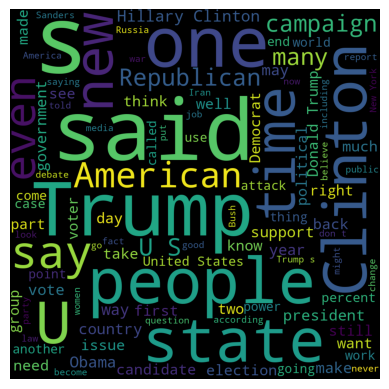

In [32]:
wc = WordCloud(background_color="black", max_words=100,
               max_font_size=256,
               random_state=42, width=1000, height=1000)
wc.generate(' '.join(given_df["text_without_stopwords"]))
plt.imshow(wc)
plt.axis('off')
plt.show()

In [33]:
fig = px.pie(data_frame=new_df, names="label",title='Proportion of Real vs. Fake News where 0 indicates fake news and 1 indicates true news')
fig.show()

In [34]:
sub_tf_df=new_df.groupby('subject').apply(lambda x:x['subject'].count()).reset_index(name='Counts')
fig = px.bar(sub_tf_df, x="subject", y="Counts",
             color='Counts', barmode='group',
             height=400)
fig.show()

In [70]:
df = pd.concat([given_df, new_df], axis =0 )

In [105]:
df.head(10)

,label,text_without_stopwords
0,0,views october gold kwn king world news t...
1,0,by brig asif h raja october asif haroon ra...
2,0,ukip meps steven woolfe mike hookem reported...
3,0,david wilcox year old chicago man brutally b...
4,1,washington cnn donald trump attempting crack...
5,0,get short url the united states cannot rul...
6,0,by john w whitehead today path total dictato...
7,0,mantracker how be one how avoid one jeremiah ...
8,0,shocking michele obama hillary caught glamo...
9,1,a wave apprehension anguish swept republican p...


In [104]:
fig = px.pie(data_frame=df, names="label",title='Proportion of Real vs. Fake News where 0 indicates fake news and 1 indicates true news')
fig.show()

In [71]:
df.to_csv('DM_PROJECT_FINAL_DATA')

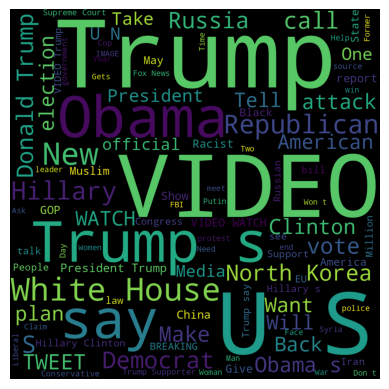

In [35]:
wc = WordCloud(background_color="black", max_words=100,
               max_font_size=256,
               random_state=42, width=1000, height=1000)
wc.generate(' '.join(new_df["title_without_stopwords"]))
plt.imshow(wc)
plt.axis('off')
plt.show()

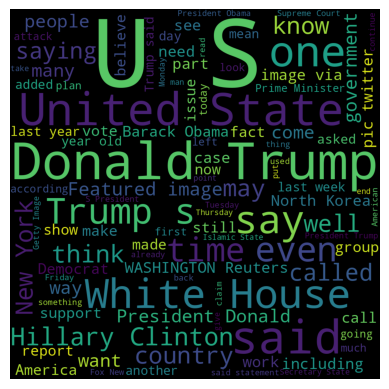

In [36]:
wc = WordCloud(background_color="black", max_words=100,
               max_font_size=256,
               random_state=42, width=1000, height=1000)
wc.generate(' '.join(new_df["text_without_stopwords"]))
plt.imshow(wc)
plt.axis('off')
plt.show()

### Random sampling from our dataframes

In [37]:
given_df = given_df.sample(frac=1)

In [38]:
given_df.head(10)

,label,text_without_stopwords
965,0,"123 Views October 31, 2016 GOLD , KWN King Wor..."
269,0,"By Brig Asif H. Raja October 31, 2016 Asif Har..."
211,0,UKIP MEPs Steven Woolfe & Mike Hookem reported...
889,0,"David Wilcox, 49 year old Chicago man brutally..."
854,1,Washington (CNN) Donald Trump attempting crack...
763,0,Get short URL 0 16 0 0 The United States canno...
362,0,By John W. Whitehead “Today path total dictato...
862,0,ManTracker: How Be One How Avoid One Jeremiah ...
16,0,Shocking! Michele Obama & Hillary Caught Glamo...
368,1,A wave apprehension anguish swept Republican P...


In [39]:
new_df = new_df.sample(frac = 1)

In [40]:
new_df.head(10)

,subject,label,text_without_stopwords,title_without_stopwords
17672,left-news,0,NBC host Megyn Kelly must really desperate gue...,MEGYN KELLY PRAISES Woman Who Flipped Off Trum...
11986,worldnews,1,NAIROBI (Reuters) - A Kenyan court Monday awar...,Kenya court awards 4 million shillings girl st...
12541,politics,0,This latest Wikileaks email evidence smoke Hil...,BREAKING: FINALLY! New Wikileaks Email…”We goi...
12421,politics,0,This first time outspoken conservative grandmo...,"KICK BUTT MOM Sends BRUTAL Message Rioting, Cr..."
20247,left-news,0,People offended everything really surprise peo...,HYSTERICAL! PRO-COP Billboard Causes Controver...
10578,politicsNews,1,CHICAGO (Reuters) - An Illinois voter’s lawsui...,Illinois judge dismisses Cruz eligibility comp...
20346,worldnews,1,"MUNICH, Germany (Reuters) - A German prosecuto...",German prosecutor demands life neo-Nazi suspec...
12998,politics,0,Dr. Milton Wolf seems take offense diagnosis H...,DR. WOLF CALLS OUT HILLARY For Lying About Pne...
22657,US_News,0,21st Century Wire says One TV personality Trum...,Watch Trump Gatecrashes Glenn Beck’s Cruz Cauc...
21498,left-news,0,Disrupting people trying dinner came end Ted C...,(VIDEO) TED CRUZ PROTESTERS GET ALL WET WHEN R...


### removal of unnecessary columns at model building

In [41]:
new_df = new_df.drop(["subject","title_without_stopwords"],axis=1)

In [42]:
new_df.head()

,label,text_without_stopwords
17672,0,NBC host Megyn Kelly must really desperate gue...
11986,1,NAIROBI (Reuters) - A Kenyan court Monday awar...
12541,0,This latest Wikileaks email evidence smoke Hil...
12421,0,This first time outspoken conservative grandmo...
20247,0,People offended everything really surprise peo...


In [43]:
given_df.head()

,label,text_without_stopwords
965,0,"123 Views October 31, 2016 GOLD , KWN King Wor..."
269,0,"By Brig Asif H. Raja October 31, 2016 Asif Har..."
211,0,UKIP MEPs Steven Woolfe & Mike Hookem reported...
889,0,"David Wilcox, 49 year old Chicago man brutally..."
854,1,Washington (CNN) Donald Trump attempting crack...


In [44]:
given_df.reset_index(inplace = True)
given_df.drop(["index"], axis = 1, inplace = True)

In [45]:
given_df.head()

,label,text_without_stopwords
0,0,"123 Views October 31, 2016 GOLD , KWN King Wor..."
1,0,"By Brig Asif H. Raja October 31, 2016 Asif Har..."
2,0,UKIP MEPs Steven Woolfe & Mike Hookem reported...
3,0,"David Wilcox, 49 year old Chicago man brutally..."
4,1,Washington (CNN) Donald Trump attempting crack...


In [46]:
new_df.reset_index(inplace = True)
new_df.drop(["index"], axis = 1, inplace = True)

In [47]:
new_df.head()

,label,text_without_stopwords
0,0,NBC host Megyn Kelly must really desperate gue...
1,1,NAIROBI (Reuters) - A Kenyan court Monday awar...
2,0,This latest Wikileaks email evidence smoke Hil...
3,0,This first time outspoken conservative grandmo...
4,0,People offended everything really surprise peo...


### extra text processing function

In [48]:
def process_words(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text) 
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)    
    return text

In [49]:
given_df["text_without_stopwords"] =given_df["text_without_stopwords"].apply(process_words)

In [50]:
new_df["text_without_stopwords"] =new_df["text_without_stopwords"].apply(process_words)

### defining the variables and the labels then splitting the data into test and train data

In [51]:
given_x = given_df["text_without_stopwords"]
given_y = given_df["label"]
given_x_train, given_x_test, given_y_train, given_y_test = train_test_split(given_x, given_y, test_size=0.25)

In [52]:
new_x = new_df["text_without_stopwords"]
new_y = new_df["label"]
new_x_train, new_x_test, new_y_train, new_y_test = train_test_split(new_x, new_y, test_size=0.25)

In [75]:
x = df["text_without_stopwords"]
y = df["label"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

### converting text into vectors

In [53]:
vectorization = TfidfVectorizer()
given_vecX_train = vectorization.fit_transform(given_x_train)
given_vecX_test = vectorization.transform(given_x_test)

In [54]:
vectorization = TfidfVectorizer()
new_vecX_train = vectorization.fit_transform(new_x_train)
new_vecX_test = vectorization.transform(new_x_test)

In [76]:
vectorization = TfidfVectorizer()
vecX_train = vectorization.fit_transform(x_train)
vecX_test = vectorization.transform(x_test)

### logistic regression model

In [55]:
LR = LogisticRegression()
LR.fit(given_vecX_train,given_y_train)

LogisticRegression()

In [56]:
pred_lr=LR.predict(given_vecX_test)
LR.score(given_vecX_test, given_y_test)

0.852

In [57]:
print(classification_report(given_y_test, pred_lr))

              precision    recall  f1-score   support

           0       0.82      0.91      0.86       128
           1       0.90      0.79      0.84       122

    accuracy                           0.85       250
   macro avg       0.86      0.85      0.85       250
weighted avg       0.86      0.85      0.85       250



In [58]:
LR = LogisticRegression()
LR.fit(new_vecX_train,new_y_train)

LogisticRegression()

In [59]:
pred_lr=LR.predict(new_vecX_test)
LR.score(new_vecX_test, new_y_test)

0.985478841870824

In [60]:
print(classification_report(new_y_test, pred_lr))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      5944
           1       0.98      0.99      0.98      5281

    accuracy                           0.99     11225
   macro avg       0.99      0.99      0.99     11225
weighted avg       0.99      0.99      0.99     11225



In [77]:
LR = LogisticRegression()
LR.fit(vecX_train,y_train)

LogisticRegression()

In [78]:
pred_lr=LR.predict(vecX_test)
LR.score(vecX_test, y_test)

0.9806535947712418

In [79]:
print(classification_report(y_test, pred_lr))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      5986
           1       0.98      0.98      0.98      5489

    accuracy                           0.98     11475
   macro avg       0.98      0.98      0.98     11475
weighted avg       0.98      0.98      0.98     11475



### decesion tree model

In [61]:
DT = DecisionTreeClassifier()
DT.fit(new_vecX_train, new_y_train)

DecisionTreeClassifier()

In [62]:
pred_dt = DT.predict(new_vecX_test)
DT.score(new_vecX_test, new_y_test)

0.9952783964365256

In [63]:
print(classification_report(new_y_test, pred_dt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5944
           1       1.00      0.99      0.99      5281

    accuracy                           1.00     11225
   macro avg       1.00      1.00      1.00     11225
weighted avg       1.00      1.00      1.00     11225



In [80]:
DT = DecisionTreeClassifier()
DT.fit(given_vecX_train, given_y_train)

DecisionTreeClassifier()

In [81]:
pred_dt = DT.predict(given_vecX_test)
DT.score(given_vecX_test, given_y_test)

0.744

In [82]:
print(classification_report(given_y_test, pred_dt))

              precision    recall  f1-score   support

           0       0.75      0.75      0.75       128
           1       0.74      0.74      0.74       122

    accuracy                           0.74       250
   macro avg       0.74      0.74      0.74       250
weighted avg       0.74      0.74      0.74       250



In [83]:
DT = DecisionTreeClassifier()
DT.fit(vecX_train, y_train)

DecisionTreeClassifier()

In [84]:
pred_dt = DT.predict(vecX_test)
DT.score(vecX_test, y_test)

0.984313725490196

In [85]:
print(classification_report(y_test, pred_dt))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      5986
           1       0.99      0.98      0.98      5489

    accuracy                           0.98     11475
   macro avg       0.98      0.98      0.98     11475
weighted avg       0.98      0.98      0.98     11475



### Random forest model

In [64]:
RF= RandomForestClassifier(random_state=0)
RF.fit(new_vecX_train, new_y_train)

RandomForestClassifier(random_state=0)

In [65]:
pred_rf = RF.predict(new_vecX_test)
RF.score(new_vecX_test, new_y_test)

0.991358574610245

In [66]:
print(classification_report(new_y_test, pred_rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5944
           1       1.00      0.99      0.99      5281

    accuracy                           1.00     11225
   macro avg       1.00      1.00      1.00     11225
weighted avg       1.00      1.00      1.00     11225



In [86]:
RF= RandomForestClassifier(random_state=0)
RF.fit(given_vecX_train, given_y_train)

RandomForestClassifier(random_state=0)

In [87]:
pred_rf = RF.predict(given_vecX_test)
RF.score(given_vecX_test, given_y_test)

0.86

In [90]:
RF= RandomForestClassifier(random_state=0)
RF.fit(vecX_train, y_train)

RandomForestClassifier(random_state=0)

In [91]:
pred_rf = RF.predict(vecX_test)
RF.score(vecX_test, y_test)

0.9833551198257081

In [95]:
print(classification_report(y_test, pred_rf))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      5986
           1       0.99      0.98      0.98      5489

    accuracy                           0.98     11475
   macro avg       0.98      0.98      0.98     11475
weighted avg       0.98      0.98      0.98     11475



### Gradient boosting model

In [67]:
GB= GradientBoostingClassifier(random_state=0)
GB.fit(new_vecX_train, new_y_train)

GradientBoostingClassifier(random_state=0)

In [68]:
pred_gb = GB.predict(new_vecX_test)
GB.score(new_vecX_test, new_y_test)

0.9952783964365256

In [97]:
print(classification_report(new_y_test, pred_gb))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      5944
           1       0.99      1.00      0.99      5281

    accuracy                           1.00     11225
   macro avg       1.00      1.00      1.00     11225
weighted avg       1.00      1.00      1.00     11225



In [98]:
GB= GradientBoostingClassifier(random_state=0)
GB.fit(given_vecX_train, given_y_train)

GradientBoostingClassifier(random_state=0)

In [99]:
pred_gb = GB.predict(given_vecX_test)
GB.score(given_vecX_test, given_y_test)

0.844

In [100]:
print(classification_report(given_y_test, pred_gb))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86       128
           1       0.88      0.79      0.83       122

    accuracy                           0.84       250
   macro avg       0.85      0.84      0.84       250
weighted avg       0.85      0.84      0.84       250



In [101]:
GB= GradientBoostingClassifier(random_state=0)
GB.fit(vecX_train, y_train)

GradientBoostingClassifier(random_state=0)

In [102]:
pred_gb = GB.predict(vecX_test)
GB.score(vecX_test, y_test)

0.9868409586056645

In [103]:
print(classification_report(y_test, pred_gb))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      5986
           1       0.99      0.98      0.99      5489

    accuracy                           0.99     11475
   macro avg       0.99      0.99      0.99     11475
weighted avg       0.99      0.99      0.99     11475

